In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

In [2]:
# Set paths to your dataset directories
TRAIN_AUDIO_DIR = 'dataset\audios_train'
TEST_AUDIO_DIR = 'dataset\audios_test'


In [26]:
# Load CSV files
train_df = pd.read_csv('C:/Users/dubey/Downloads/shl-intern-hiring-assessment (1)/dataset/train.csv')
test_df = pd.read_csv('C:/Users/dubey/Downloads/shl-intern-hiring-assessment (1)/dataset/test.csv')
print("Training samples:", train_df.shape[0])
print("Test samples:", test_df.shape[0])

Training samples: 444
Test samples: 195


In [7]:
# Display the first few rows of the training data
print("First 5 rows of training data:")
print(train_df.head())

First 5 rows of training data:
         filename
0   audio_706.wav
1   audio_800.wav
2    audio_68.wav
3  audio_1267.wav
4   audio_683.wav


In [8]:
# Basic statistics about the training data
print("\nTraining Data Summary:")
print(train_df.describe())




Training Data Summary:
             filename
count             195
unique            195
top     audio_706.wav
freq                1


In [9]:


# Check for missing values
print("\nMissing values in training data:")
print(train_df.isnull().sum())


Missing values in training data:
filename    0
dtype: int64


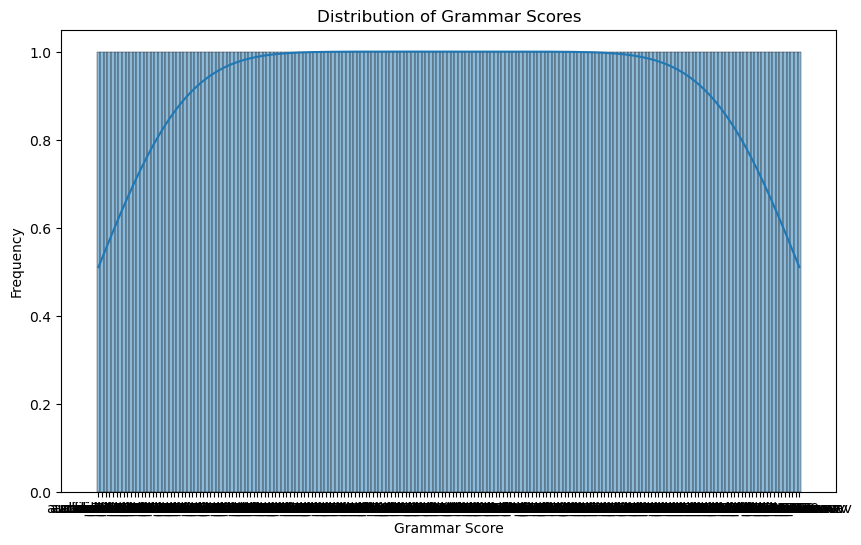

In [11]:
# Plot distribution of Grammar Scores
plt.figure(figsize=(10, 6))
sns.histplot(train_df['filename'], bins=10, kde=True)
plt.title('Distribution of Grammar Scores')
plt.xlabel('Grammar Score')
plt.ylabel('Frequency')
plt.show()


C:\Users\dubey\AppData\Local\Temp\ipykernel_4668\982126251.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=sr)
c:\Users\dubey\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading dataset/audios_train\audio_706.wav: [Errno 2] No such file or directory: 'dataset/audios_train\\audio_706.wav'
Error loading dataset/audios_train\audio_800.wav: [Errno 2] No such file or directory: 'dataset/audios_train\\audio_800.wav'
Error loading dataset/audios_train\audio_68.wav: [Errno 2] No such file or directory: 'dataset/audios_train\\audio_68.wav'
Error loading dataset/audios_train\audio_1267.wav: [Errno 2] No such file or directory: 'dataset/audios_train\\audio_1267.wav'
Error loading dataset/audios_train\audio_683.wav: [Errno 2] No such file or directory: 'dataset/audios_train\\audio_683.wav'
Error loading dataset/audios_train\audio_1242.wav: [Errno 2] No such file or directory: 'dataset/audios_train\\audio_1242.wav'
Error loading dataset/audios_train\audio_908.wav: [Errno 2] No such file or directory: 'dataset/audios_train\\audio_908.wav'
Error loading dataset/audios_train\audio_888.wav: [Errno 2] No such file or directory: 'dataset/audios_train\\audio_888.wav

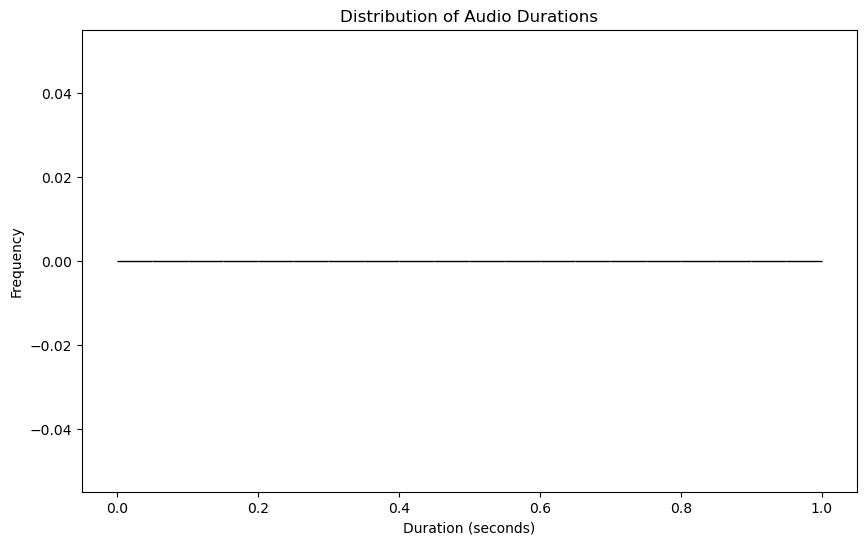

In [17]:
import os
import librosa

def get_audio_duration(file_path, sr=22050):
    try:
        y, sr = librosa.load(file_path, sr=sr)
        return librosa.get_duration(y=y, sr=sr)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Compute durations for each audio file in the training set
durations = []
for file in train_df['filename']:
    path = os.path.join('dataset/audios_train', file)
    duration = get_audio_duration(path)
    durations.append(duration)

# Add durations as a new column in the training dataframe
train_df['duration'] = durations

# Plot the distribution of audio durations
plt.figure(figsize=(10, 6))
sns.histplot(train_df['duration'], bins=20, kde=True, color='teal')
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


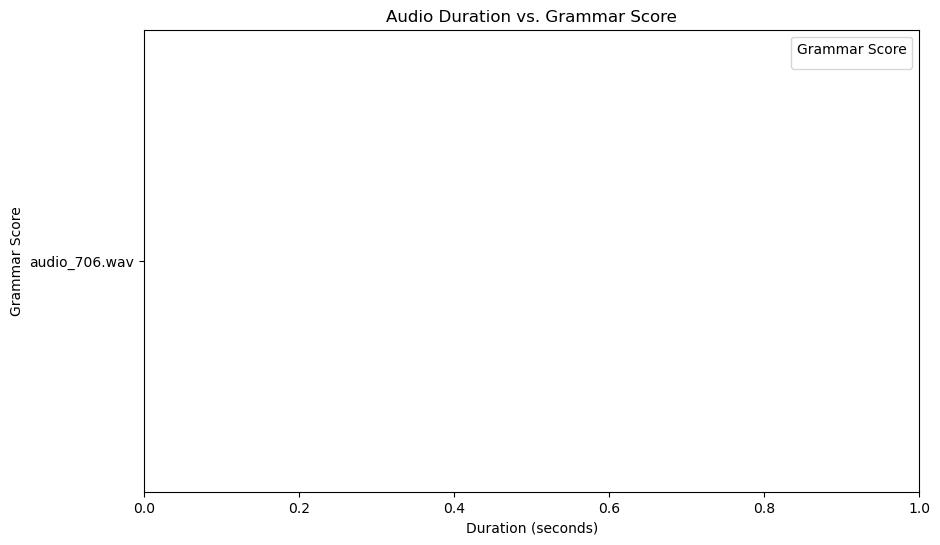

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='duration', y='filename', hue='filename', palette='coolwarm')
plt.title("Audio Duration vs. Grammar Score")
plt.xlabel("Duration (seconds)")
plt.ylabel("Grammar Score")
plt.legend(title='Grammar Score')
plt.show()


In [13]:
# If there's any categorical feature or file names you want to examine,
# you can also check their unique values or counts. For example:
print("\nUnique file names in training data:")
print(train_df['filename'].nunique())


Unique file names in training data:
195


## 3. Model Training and Evaluation

Split the training data into training and validation sets. Train a regression model (e.g., RandomForestRegressor) to predict scores. Then evaluate using metrics such as MSE and MAE.

In [30]:
import os

TRAIN_AUDIO_DIR = 'C:/Users/dubey/Downloads/shl-intern-hiring-assessment (1)/dataset/audios_train'  # Adjust the path as needed

# List files in the directory to confirm they exist
files = os.listdir(TRAIN_AUDIO_DIR)
print("Files in the training directory:", files[:5])  # Print the first 5 files


Files in the training directory: ['audio_1008.wav', 'audio_1017.wav', 'audio_102.wav', 'audio_1024.wav', 'audio_1025.wav']


In [31]:
# For example, if the audios_train folder is in the current directory:
TRAIN_AUDIO_DIR = 'audios_train'


In [32]:
file_path = os.path.join(TRAIN_AUDIO_DIR, row['filename'])


In [35]:
import os
import librosa

TRAIN_AUDIO_DIR = 'C:/Users/dubey/Downloads/shl-intern-hiring-assessment (1)/dataset/audios_train'

# List a few audio files
audio_files = [f for f in os.listdir(TRAIN_AUDIO_DIR) if f.endswith('.wav')]
print("Sample files:", audio_files[:5])

# Load a sample audio
file_path = os.path.join(TRAIN_AUDIO_DIR, audio_files[0])
y, sr = librosa.load(file_path, sr=None)
print(f"Loaded: {file_path} | Duration: {len(y)/sr:.2f} sec | Sample Rate: {sr}")


Sample files: ['audio_1008.wav', 'audio_1017.wav', 'audio_102.wav', 'audio_1024.wav', 'audio_1025.wav']
Loaded: C:/Users/dubey/Downloads/shl-intern-hiring-assessment (1)/dataset/audios_train\audio_1008.wav | Duration: 60.01 sec | Sample Rate: 16000


In [36]:
import pandas as pd

data = []
for file in audio_files:
    path = os.path.join(TRAIN_AUDIO_DIR, file)
    try:
        y, sr = librosa.load(path, sr=None)
        duration = len(y) / sr
        data.append({'filename': file, 'duration': duration, 'sample_rate': sr})
    except Exception as e:
        print(f"Error loading {file}: {e}")

df = pd.DataFrame(data)
print(df.head())


         filename   duration  sample_rate
0  audio_1008.wav  60.010688        16000
1  audio_1017.wav  60.074688        16000
2   audio_102.wav  60.074688        16000
3  audio_1024.wav  60.074688        16000
4  audio_1025.wav  61.034687        16000


In [38]:
import numpy as np
import librosa

def extract_logmel(file_path, sr=16000, n_mels=128):
    y, _ = librosa.load(file_path, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    logmel = librosa.power_to_db(mel)
    return logmel

# Example
logmel = extract_logmel(file_path)
print(logmel.shape)



(128, 1876)


In [40]:
for idx, row in train_df.iterrows():
    file_path = os.path.join(TRAIN_AUDIO_DIR, row['filename'])
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip to the next file
    
    features = extract_features(file_path)
    if features is not None:
        features_list.append(features)
        labels.append(row['label'])


In [54]:
import os
import numpy as np
import pandas as pd
import librosa

# Load CSV
train_df = pd.read_csv("C:/Users/dubey/Downloads/shl-intern-hiring-assessment (1)/dataset/train.csv")

# Audio directory
TRAIN_AUDIO_DIR = 'C:/Users/dubey/Downloads/shl-intern-hiring-assessment (1)/dataset/audios_train'

# Feature extractor function
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None

# Extract features for all audio files
features_list = []
labels = []

for idx, row in train_df.iterrows():
    file_name = row["filename"]
    label = row["label"]
    file_path = os.path.join(TRAIN_AUDIO_DIR, file_name)  # ✅ FIXED LINE

    if os.path.exists(file_path):
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            labels.append(label)
        else:
            print(f"⚠️ Failed to extract features from: {file_path}")
    else:
        print(f"❌ File not found: {file_path}")

# Convert to NumPy arrays
X = np.array(features_list)
y = np.array(labels)

print("✅ Feature extraction complete.")
print("Extracted features shape:", X.shape)
print("Labels shape:", y.shape)


✅ Feature extraction complete.
Extracted features shape: (444, 20)
Labels shape: (444,)


Validation MSE: 1.0830837078651685
Validation MAE: 0.9166292134831462


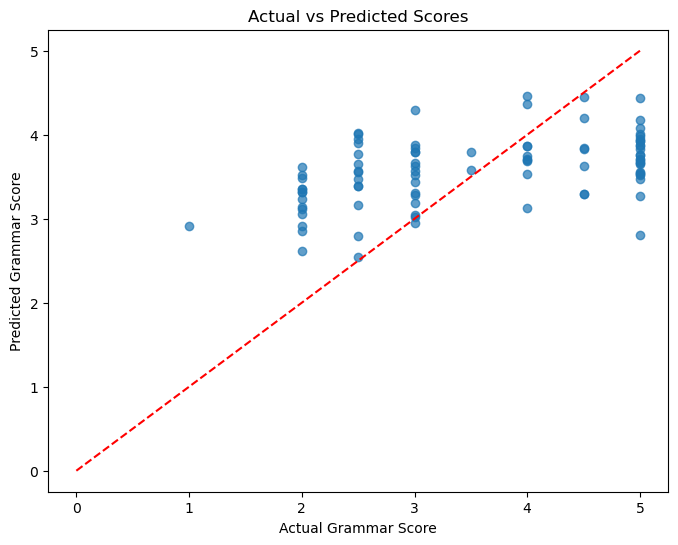

✅ Model saved as grammar_scoring_model.pkl


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import joblib

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_val)

# Evaluate
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print("Validation MSE:", mse)
print("Validation MAE:", mae)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.7)
plt.xlabel("Actual Grammar Score")
plt.ylabel("Predicted Grammar Score")
plt.title("Actual vs Predicted Scores")
plt.plot([0, 5], [0, 5], 'r--')
plt.show()

# Save model
joblib.dump(model, "grammar_scoring_model.pkl")
print("✅ Model saved as grammar_scoring_model.pkl")
